#                           MACHINE LEARNING 1,2,3,4,5 & 6

### 2.1. Problem Statement: Machine Learning 1 

#### 1. What are the three stages to build the hypotheses or model in machine learning?

Ans: 1) Model Building
     2) Model Testing
     3) Applying the model

#### 2. What is the standard approach to supervised learning? 

Ans: The Standard approch to supervised learning is to split the set of example into the training set and test.

#### 3. What is Training set and Test set? 

Ans: In Various areas of information science like machine learning, a set of data is used to discover the potentially predictive relationship known as 'Training Set'. Training Set is an examples given to learner, while Test Set is used to test the accuracy of the hypotheses generated by the learner, and it is the set of example held back from the learner. Training set are distinct from Test set.

#### 4. What is the general principle of an ensemble method and what is bagging and boosting in ensemble method?

Ans: The general principle of an ensemble method: Ensemble model combines multiple 'individual' (diverse) models together and delivers superior prediction power.

Bagging (Bootstrap Aggregating):  is an ensemble method. First, we create random samples of the training data set (sub sets of training data set). Then, we build a classifier for each sample. Finally, results of these multiple classifiers are combined using average or majority voting. Bagging helps to reduce the variance error.

Boosting: Boosting provides sequential learning of the predictors. The first predictor is learned on the whole data set, while the following are learnt on the training set based on the performance of the previous one. It starts by classifying original data set and giving equal weights to each observation. If classes are predicted incorrectly using the first learner, then it gives higher weight to the missed classified observation. Being an iterative process, it continues to add classifier learner until a limit is reached in the number of models or accuracy. Boosting has shown better predictive accuracy than bagging, but it also tends to over-fit the training data as well. 

Most common example of boosting is AdaBoost and Gradient Boosting.


#### 5. How can you avoid overfitting ? 

Ans: Detecting overfitting is useful, but it doesn’t solve the problem. Fortunately, you have several options to try.

Here are a few of the most popular solutions for overfitting:

Cross-validation
Cross-validation is a powerful preventative measure against overfitting.

The idea is clever: Use your initial training data to generate multiple mini train-test splits. Use these splits to tune your model.

In standard k-fold cross-validation, we partition the data into k subsets, called folds. Then, we iteratively train the algorithm on k-1 folds while using the remaining fold as the test set (called the “holdout fold”).

K-Fold Cross-Validation
K-Fold Cross-Validation

Cross-validation allows you to tune hyperparameters with only your original training set. This allows you to keep your test set as a truly unseen dataset for selecting your final model.


### 2.2. Problem Statement: Machine Learning 2

#### Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable ?

In [1]:
import numpy as np 
 
import pandas as pd 
 
import scipy.stats as stats 
 
import matplotlib.pyplot as plt 
 
import sklearn 
 
from sklearn.datasets import load_boston 
 
boston = load_boston() 
 
bos = pd.DataFrame(boston.data)

In [2]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
boston.data.shape

(506, 13)

In [7]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [8]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
boston.target[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [12]:
bos['Price'] = boston.target

In [15]:
from sklearn.linear_model import LinearRegression
x = bos.drop('Price', axis = 1)

lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
lm.fit(x,bos.Price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
print('Estimated intercept coefficient:',lm.intercept_)

Estimated intercept coefficient: 36.45948838509024


In [19]:
print('Number of coefficients:',len(lm.coef_))

Number of coefficients: 13


In [21]:
pd.DataFrame(zip(x.columns,lm.coef_),columns = ['features','estimated coefficients'])

,features,estimated coefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


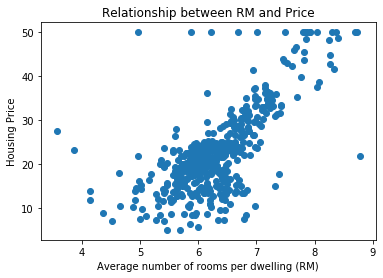

In [23]:
plt.scatter(bos.RM,bos.Price)
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")
plt.show()

In [24]:
lm.predict(x)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

Text(0.5, 1.0, 'Prices vs Predicted Prices: $y_i$ vs $\\hat{y}_i$')

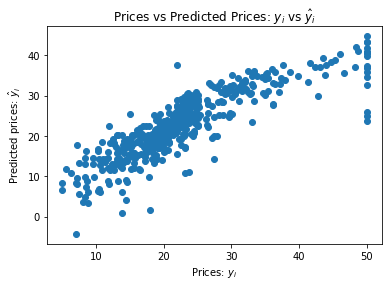

In [25]:
plt.scatter(bos.Price,lm.predict(x))
plt.xlabel("Prices: $y_i$")
plt.ylabel("Predicted prices: $\hat{y}_i$")
plt.title("Prices vs Predicted Prices: $y_i$ vs $\hat{y}_i$")

In [26]:
msefull = np.mean((bos.Price - lm.predict(x))**2)
print(msefull)

21.89483118172923


In [27]:
lm = LinearRegression()
lm.fit(x[['PTRATIO']],bos.Price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
msePTRATIO = np.mean((bos.Price - lm.predict(x[['PTRATIO']]))**2)
print(msePTRATIO)

62.65220001376928


### Training and Validating Data sets

In [35]:
x_train = x[:-50]
x_test = x[-50:]
y_train = bos.Price[:-50]
y_test = bos.Price[-50:]
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(456, 13)
(50, 13)
(456,)
(50,)


### How to do train-test split:

In [56]:
lm = LinearRegression()
lm.fit(x_train,y_train)
pred_train = lm.predict(x_train)
pred_test = lm.predict(x_test)

In [58]:
print("Fit a model x_train, and calculate MSE with y_train:",np.mean((y_train-lm.predict(x_train))**2))
print("Fit a model x_train, and calculate MSE with x_test,y_test:",np.mean((y_test-lm.predict(x_test))**2))

Fit a model x_train, and calculate MSE with y_train: 23.189043417691362
Fit a model x_train, and calculate MSE with x_test,y_test: 10.96041067942293


Text(0, 0.5, 'Residuals')

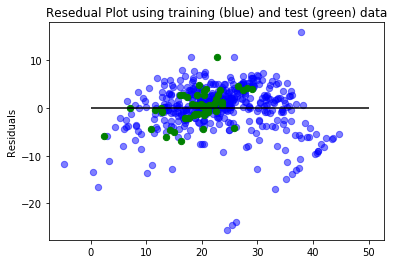

In [59]:
plt.scatter(lm.predict(x_train),lm.predict(x_train)-y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(x_test), lm.predict(x_test)-y_test,c='g', s=40)
plt.hlines(y=0, xmin=0, xmax=50)
plt.title('Resedual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

### 2.3. Problem Statement: Machine Learning 3 

#### I decided to treat this as a classification problem by creating a new binary variable affair (did the woman have at least one affair?) and trying to predict the classification for each woman. 

In [2]:
import numpy as np 
 
import pandas as pd 
 
import statsmodels.api as sm 
 
import matplotlib.pyplot as plt 
 
from patsy import dmatrices 
 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.model_selection import cross_val_score 

In [3]:
dta = sm.datasets.fair.load_pandas().data
dta['affair'] = (dta.affairs > 0).astype(int)
dta.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [5]:
dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


In [10]:
%matplotlib notebook

<IPython.core.display.Javascript object>


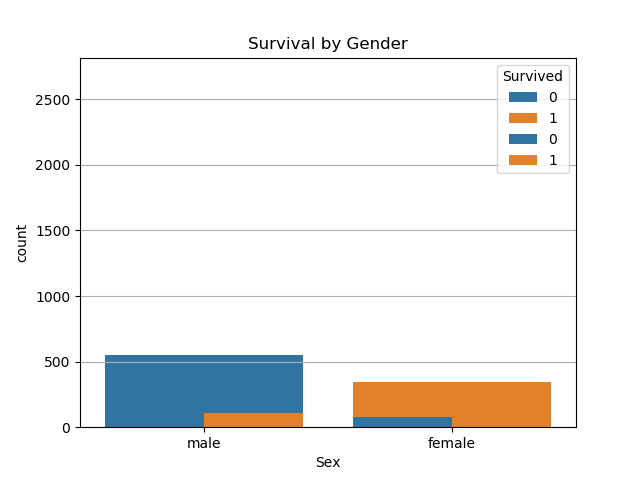

Text(0, 0.5, 'Frequency')

In [11]:
dta.educ.hist()
plt.title('Histogram of Education')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

In [12]:
dta.rate_marriage.hist()
plt.title('Histogram  of Marriage Rating')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')
plt.show()

<IPython.core.display.Javascript object>


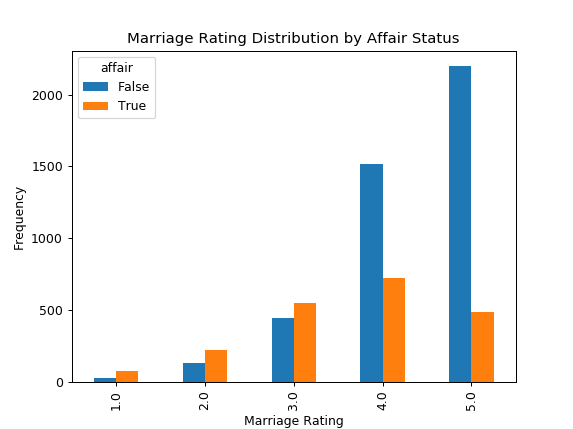

Text(0, 0.5, 'Frequency')

In [41]:
pd.crosstab(dta.rate_marriage, dta.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

<IPython.core.display.Javascript object>


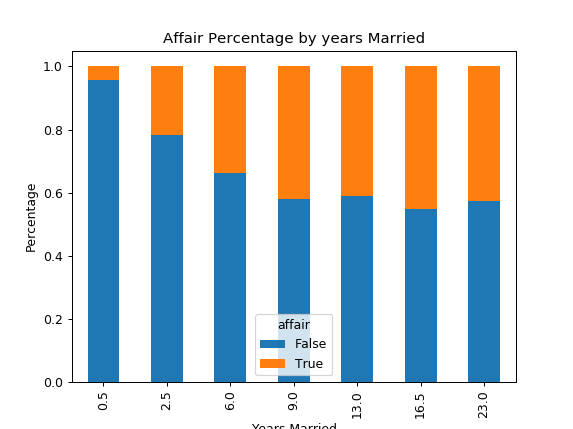

Text(0, 0.5, 'Percentage')

In [42]:
affair_yrs_married = pd.crosstab(dta.yrs_married, dta.affair.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.title('Affair Percentage by years Married')
plt.xlabel('Years Married')
plt.ylabel('Percentage')

In [43]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [15]:
y, x = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + C(occupation) + C(occupation_husb)',dta, return_type = "dataframe")
print(x.columns)

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious'],
      dtype='object')


In [16]:
x = x.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                       'C(occupation)[T.3.0]':'occ_3',
                       'C(occupation)[T.4.0]':'occ_4',
                       'C(occupation)[T.5.0]':'occ_5',
                       'C(occupation)[T.6.0]':'occ_6',
                       'C(occupation_husb)[T.2.0]':'occ_husb_2',
                       'C(occupation_husb)[T.3.0]':'occ_husb_3',
                       'C(occupation_husb)[T.4.0]':'occ_husb_4',
                       'C(occupation_husb)[T.5.0]':'occ_husb_5',
                       'C(occupation_husb)[T.6.0]':'occ_husb_6',})

In [17]:
y = np.ravel(y)

In [18]:
model = LogisticRegression()
model = model.fit(x,y)
model.score(x,y)

C:\Users\RK\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7262016965127238

In [53]:
print("\nPercentage of women having Affairs\n","\n","-"*60,sep = '')
y.mean()


Percentage of women having Affairs

------------------------------------------------------------


0.3224945020420987

In [54]:
pd.DataFrame(zip(x.columns, np.transpose(model.coef_)))

,0,1
0,Intercept,[1.5134268652172285]
1,occ_2,[0.18335719334153688]
2,occ_3,[0.4949250702617438]
3,occ_4,[0.25557618832044326]
4,occ_5,[0.8372123259983327]
5,occ_6,[0.8466313246209732]
6,occ_husb_2,[0.18800524453134923]
7,occ_husb_3,[0.29587706117836654]
8,occ_husb_4,[0.1599483719579461]
9,occ_husb_5,[0.18722283140957388]


### 2.4. Problem Statement: Machine Learning 4 

#### Predicting Survival in the Titanic Data Set 

In [164]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
import sklearn 
from pandas import Series, DataFrame 
from pylab import rcParams 
from sklearn import preprocessing 
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,precision_score, recall_score,roc_curve,auc
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import classification_report 
%matplotlib inline

In [165]:
train_original = pd.read_csv("train.csv",sep=',')
test_original = pd.read_csv("test.csv",sep=',')

In [166]:
train_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [167]:
train=train_original.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
test=test_original.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
total=[train,test]

train.shape,test.shape


((891, 8), (418, 7))

In [168]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [169]:
train[train['Age'].isnull()].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q


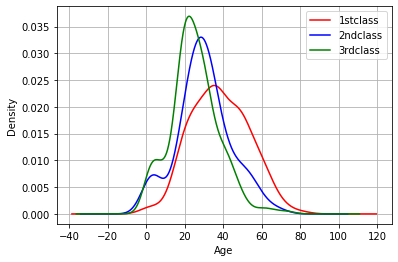

In [170]:
train[train.Pclass==1].Age.plot(kind='kde',color='r',label='1stclass')
train[train.Pclass==2].Age.plot(kind='kde',color='b',label='2ndclass')
train[train.Pclass==3].Age.plot(kind='kde',color='g',label='3rdclass')
plt.xlabel('Age')
plt.legend(loc='best')
plt.grid()

In [171]:
def fill_missing_age(dataset):
    for i in range(1,4):
        median_age=dataset[dataset["Pclass"]==i]["Age"].median()
        dataset["Age"]=dataset["Age"].fillna(median_age)
        return dataset
train=fill_missing_age(train)

In [172]:
train[train['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


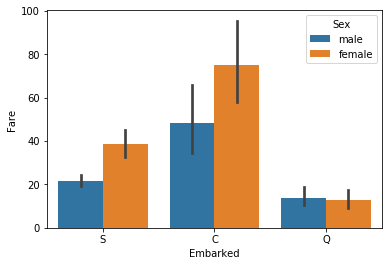

In [173]:
sb.barplot(x="Embarked",y="Fare",hue="Sex",data=train)

In [174]:
train["Embarked"]=train["Embarked"].fillna('C')

In [175]:
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [176]:
test[test['Age'].isnull()].head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
10,3,male,NaN,0,0,7.8958,S
22,1,female,NaN,0,0,31.6833,S
29,3,male,NaN,2,0,21.6792,C
33,3,female,NaN,1,2,23.4500,S
36,3,female,NaN,0,0,8.0500,S


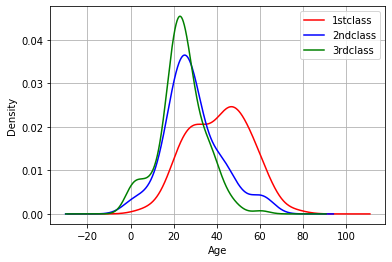

In [177]:
test[test.Pclass==1].Age.plot(kind='kde',color='r',label='1stclass')
test[test.Pclass==2].Age.plot(kind='kde',color='b',label='2ndclass')
test[test.Pclass==3].Age.plot(kind='kde',color='g',label='3rdclass')
plt.xlabel('Age')
plt.legend(loc='best')
plt.grid()


In [178]:
test=fill_missing_age(test)

In [179]:
##Faremissingcases
test[test['Fare'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,3,male,60.5,0,0,NaN,S


In [180]:
def fill_missing_fare(dataset):
    median_fare=dataset[(dataset["Pclass"]==3)&(dataset["Embarked"]=="S")]["Fare"].median()
    dataset["Fare"]=dataset["Fare"].fillna(median_fare)
    return dataset


test=fill_missing_fare(test)

In [181]:
train.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [182]:
test.isnull().any()

Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

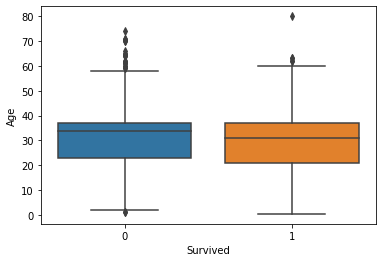

In [183]:
sb.boxplot(x=train["Survived"],y=train["Age"])

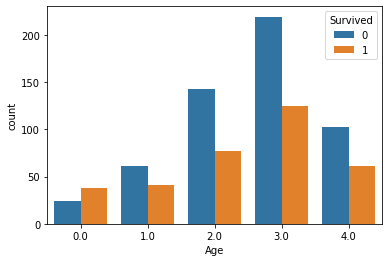

In [184]:
for dataset in total:
    dataset.loc[dataset["Age"]<=9,"Age"]=0
    dataset.loc[(dataset["Age"]>9)&(dataset["Age"]<=19),"Age"] = 1
    dataset.loc[(dataset["Age"]>19)&(dataset["Age"]<=29),"Age"]=2
    dataset.loc[(dataset["Age"]>29)&(dataset["Age"]<=39),"Age"]=3
    dataset.loc[(dataset["Age"]>29)&(dataset["Age"]<=39),"Age"]=3
    dataset.loc[dataset["Age"]>39,"Age"]=4
    
sb.countplot(x="Age",data=train,hue="Survived")


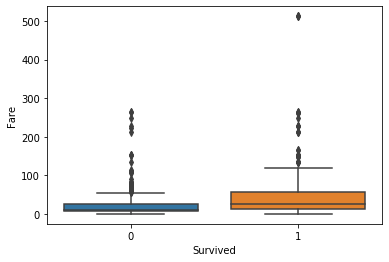

In [185]:
sb.boxplot(x=train["Survived"],y=train["Fare"])

In [186]:
pd.qcut(train["Fare"],8).value_counts()

(-0.001, 7.75]       140
(9.841, 14.454]      113
(69.488, 512.329]    112
(24.479, 31.0]       112
(7.91, 9.841]        111
(31.0, 69.488]       110
(14.454, 24.479]     110
(7.75, 7.91]          83
Name: Fare, dtype: int64

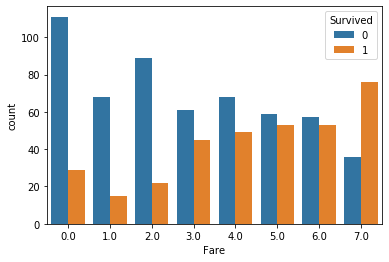

In [187]:
for dataset in total:
    dataset.loc[dataset["Fare"]<=7.75,"Fare"]=0
    dataset.loc[(dataset["Fare"]>7.75)&(dataset["Fare"]<=7.91),"Fare"]=1
    dataset.loc[(dataset["Fare"]>7.91)&(dataset["Fare"]<=9.841),"Fare"]=2
    dataset.loc[(dataset["Fare"]>9.841)&(dataset["Fare"]<=14.454),"Fare"]=3
    dataset.loc[(dataset["Fare"]>14.454)&(dataset["Fare"]<=24.479),"Fare"]=4
    dataset.loc[(dataset["Fare"]>24.479)&(dataset["Fare"]<=31),"Fare"]=5
    dataset.loc[(dataset["Fare"]>31)&(dataset["Fare"]<=69.487),"Fare"]=6
    dataset.loc[dataset["Fare"]>69.487,"Fare"]=7
sb.countplot(x="Fare",data=train,hue="Survived")


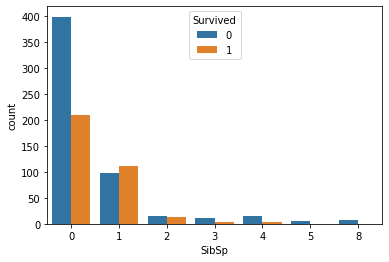

In [189]:
sb.countplot(x="SibSp",data=train,hue="Survived")

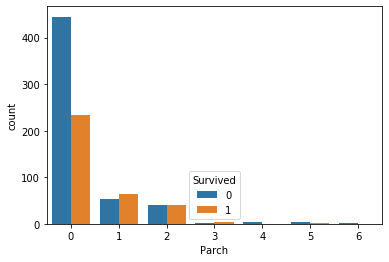

In [190]:
sb.countplot(x="Parch",data=train,hue="Survived")

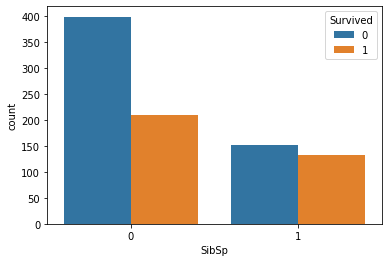

In [191]:
for dataset in total:
    dataset.loc[dataset["SibSp"]==0,"SibSp"]=0
    dataset.loc[dataset["SibSp"]!=0,"SibSp"]=1

sb.countplot(x="SibSp",data=train,hue="Survived")


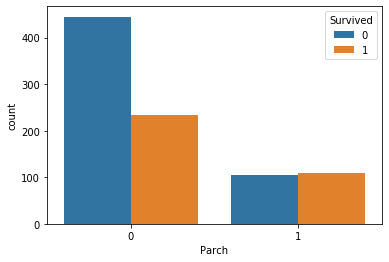

In [192]:
for dataset in total:
    dataset.loc[dataset["Parch"]==0,"Parch"]=0
    dataset.loc[dataset["Parch"]!=0,"Parch"]=1

sb.countplot(x="Parch",data=train,hue="Survived")

#### Convert categorical features to numeric

In [193]:
sex={'female':0,'male':1}
embarked={'C':0,'Q':1,'S':2}

In [194]:
for dataset in total:
    dataset['Sex']=dataset['Sex'].map(sex)
    dataset['Embarked']=dataset['Embarked'].map(embarked)

train.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,2.0,1,0,0.0,2
1,1,1,0,3.0,1,0,7.0,0
2,1,3,0,2.0,0,0,2.0,2
3,1,1,0,3.0,1,0,6.0,2
4,0,3,1,3.0,0,0,2.0,2


In [208]:
survived_cases=0

for i in range(891):
    if train.Survived[i]==1:
        survived_cases=survived_cases+1

total_survival_rate=float(survived_cases)/float(891)
print("\nTotal survival rate was\n","-"*60,sep='')
print('%0.4f'%(total_survival_rate))



Total survival rate was
------------------------------------------------------------
0.3838


In [216]:
import warnings
warnings.filterwarnings("ignore")
##Importanalysismodules
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree  import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,precision_score, recall_score,roc_curve,auc
##Importvisualizationmodules
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb
%matplotlib inline

In [223]:
def survival_rate(feature):
    rate = train[[feature,'Survived']].groupby([feature], as_index=False).mean().sort_values(by=[feature],ascending=True)
    sb.factorplot(x=feature,y="Survived", data = rate)


Summary of Survived Passengers on Bases of Age,Fare,SibSp,Parch,Sex,Embarked,Pclass
-----------------------------------------------------------------------------------


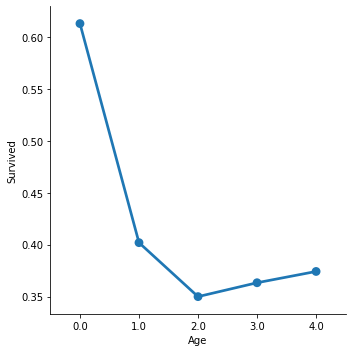

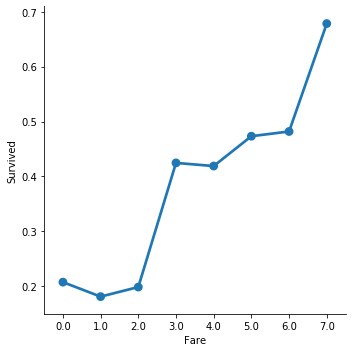

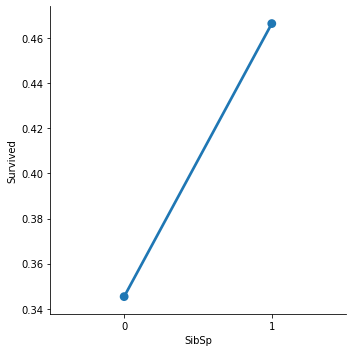

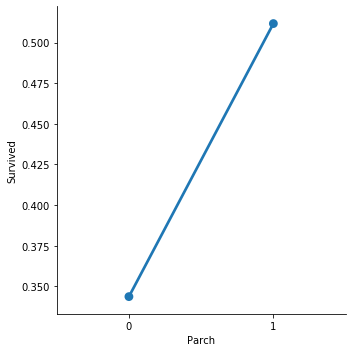

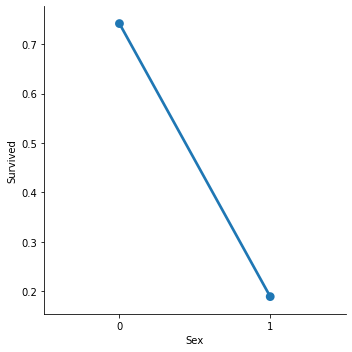

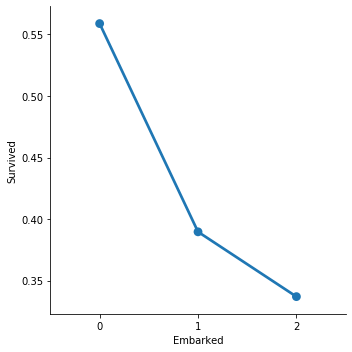

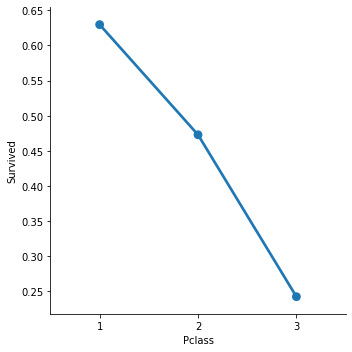

In [230]:
for feature in["Age","Fare","SibSp","Parch","Sex","Embarked","Pclass"]:
    survival_rate(feature)
    
print("\nSummary of Survived Passengers on Bases of Age,Fare,SibSp,Parch,Sex,Embarked,Pclass","\n","-"*83, sep = '')

#### Inter-relationshipbetweenFareandPclass

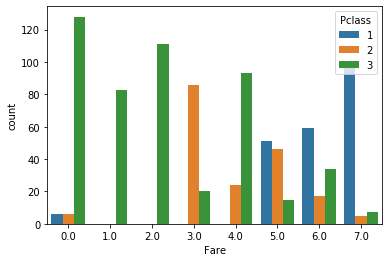

In [231]:
sb.countplot(x="Fare",data=train,hue="Pclass")

#### RelationshipbetweenEmbarkedandotherfeatures

In [232]:
train.groupby(["Embarked"],as_index=False).mean()

,Embarked,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,0.558824,1.876471,0.558824,2.594118,0.347059,0.264706,4.458824
1,1,0.389610,2.909091,0.532468,2.701299,0.233766,0.103896,1.467532
2,2,0.336957,2.350932,0.684783,2.448758,0.319876,0.248447,3.453416


### 2.5. Problem Statement: Machine Learning 5

#### building random forest model after normalizing the variable to house pricing from boston data set

In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets
boston=datasets.load_boston()
bos=pd.DataFrame(boston.data,columns=boston.feature_names)
bos['price']=boston.target

In [239]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [240]:
bos.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [241]:
X=bos.iloc[:,0:-1]
y=bos.iloc[:,-1]

In [243]:
from sklearn.model_selection import KFold
cv=KFold(n_splits=10,shuffle=True,random_state=12)

In [245]:
regressor=RandomForestRegressor(n_estimators=10,random_state=42)
for train_fold,valid_fold in cv.split(X):
    train=X.loc[train_fold]#Extracttraindatawithcvindices
    valid=X.loc[valid_fold]#Extractvaliddatawithcvindices
    train_y=y.loc[train_fold]
    valid_y=y.loc[valid_fold]
    model=regressor.fit(X=train,y=train_y)
    model_pred=model.predict(X=valid)
    errors=abs(model_pred-valid_y)
#Printoutthemeanabsoluteerror
print('Mean Absolute Error:',round(np.mean(errors),2))


Mean Absolute Error: 2.44


In [246]:
#Printthefirst10trueandpredictedresponses
model_pred[0:10]

array([14.82, 19.82, 23.55, 24.1 , 23.17, 28.21, 23.99, 19.64, 18.83,
       19.65])

In [247]:
valid_y[0:10].values

array([14.8, 19.4, 23.4, 24.1, 24.8, 28.7, 27.5, 20.1, 19.4, 21.7])

In [248]:
#SplittingthedatasetintoTrainingsetandTestset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [249]:
regressor=RandomForestRegressor(n_estimators=10,random_state=42)
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [250]:
y_pred=regressor.predict(X_test)

In [251]:
#Printthefirst10trueandpredictedresponses
y_test[0:10].values

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [252]:
y_pred[0:10]

array([22.48, 30.03, 17.75, 22.98, 16.24, 21.69, 21.13, 16.3 , 20.66,
       19.96])

In [253]:
#Calculatetheabsoluteerrors
errors=abs(y_pred-y_test)
#Printoutthemeanabsoluteerror
print('MeanAbsoluteError:',round(np.mean(errors),2))


MeanAbsoluteError: 2.06


### 2.6. Problem Statement: Machine Learning 6

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set(style="darkgrid")
from time import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

#Import'GridSearchCV','make_scorer',andanyothernecessarylibraries

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

#Importthethreesupervisedlearningmodelsfromsklearn

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Prettydisplayfornotebooks
%matplotlib inline


In [4]:
import os
os.chdir('Downloads')

In [5]:
columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation',
'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country', 'income']

In [6]:
adult_train=pd.read_csv('adult.txt',header=None,names=columns,skipinitialspace=True)

In [7]:
adult_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
4,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
5,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
6,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
7,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
8,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
9,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K


In [8]:
#Drop the fnlwgt column which isuse less for later analysis
adult_train=adult_train.drop('fnlwgt',axis=1)

In [9]:
#Displayseveralrowsandshapeofdataset

display(adult_train.head())
display(adult_train.shape)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,90,?,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,66,?,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
4,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K


(32562, 14)

In [10]:
#Read in test data

adult_test=pd.read_csv('adult_test.txt',header=None,skiprows=1,names=columns, skipinitialspace=True)

In [11]:
#Dropthefnlwgtcolumnwhichisuselessforlateranalysis

adult_test=adult_test.drop('fnlwgt',axis=1)

In [12]:
#Remove'.'inincomecolumn
adult_test['income']=adult_test['income'].apply(lambda x:'>50K'if x=='>50K.'else'<=50K')

In [13]:
#Review several rows and shape of dataset

display(adult_test.head())
display(adult_test.shape)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


(16281, 14)

In [14]:
#Examineiftherearemissingvalue
adult_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32562 entries, 0 to 32561
Data columns (total 14 columns):
age               32562 non-null object
workclass         32562 non-null object
education         32562 non-null object
education-num     32562 non-null object
marital-status    32562 non-null object
occupation        32562 non-null object
relationship      32562 non-null object
race              32562 non-null object
sex               32562 non-null object
capital-gain      32562 non-null object
capital-loss      32562 non-null object
hours-per-week    32562 non-null object
native-country    32562 non-null object
income            32562 non-null object
dtypes: object(14)
memory usage: 3.5+ MB


In [15]:
#CheckmissingvaluecodeandconverttoNaNs

object_col=adult_train.select_dtypes(include=object).columns.tolist()

for col in object_col:
    print(adult_train[col].value_counts(dropna=False)/adult_train.shape[0],'\n')

36     0.027578
31     0.027271
34     0.027210
23     0.026933
35     0.026903
33     0.026872
28     0.026626
30     0.026442
37     0.026350
25     0.025828
27     0.025643
32     0.025428
38     0.025398
39     0.025060
29     0.024968
41     0.024814
24     0.024507
40     0.024384
26     0.024108
42     0.023954
43     0.023647
22     0.023494
20     0.023125
46     0.022634
45     0.022542
44     0.022235
21     0.022112
19     0.021866
47     0.021743
50     0.018488
         ...   
61     0.009213
62     0.007923
63     0.007063
64     0.006388
65     0.005466
67     0.004637
66     0.004607
68     0.003685
69     0.003317
70     0.002733
71     0.002211
72     0.002058
73     0.001965
74     0.001566
76     0.001413
75     0.001382
90     0.001321
77     0.000891
78     0.000706
79     0.000676
80     0.000676
81     0.000614
82     0.000369
84     0.000307
83     0.000184
85     0.000092
88     0.000092
87     0.000031
86     0.000031
age    0.000031
Name: age, Length: 74, d

In [16]:
for col in object_col:
    adult_train.loc[adult_train[col]=='?',col]=np.nan
    adult_test.loc[adult_test[col]=='?',col]=np.nan

C:\Users\RK\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [17]:
col_missing_pct=adult_train.isna().sum()/adult_train.shape[0]
col_missing_pct.sort_values(ascending=False)

occupation        0.056600
workclass         0.056385
native-country    0.017904
income            0.000000
hours-per-week    0.000000
capital-loss      0.000000
capital-gain      0.000000
sex               0.000000
race              0.000000
relationship      0.000000
marital-status    0.000000
education-num     0.000000
education         0.000000
age               0.000000
dtype: float64

In [18]:
#Removedataentrieswithmissingvalue
adult_train=adult_train.dropna(axis=0,how='any')
adult_test=adult_test.dropna(axis=0,how='any')

In [19]:
#Showtheresultsofthesplit
print("After removing the missing value:")
print("Training set has {} samples.".format(adult_train.shape[0]))
print("Testing set has {} samples.".format(adult_test.shape[0]))

After removing the missing value:
Training set has 30163 samples.
Testing set has 15060 samples.


In [20]:
#Combinethedata
adult_data=pd.concat([adult_train,adult_test])

C:\Users\RK\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


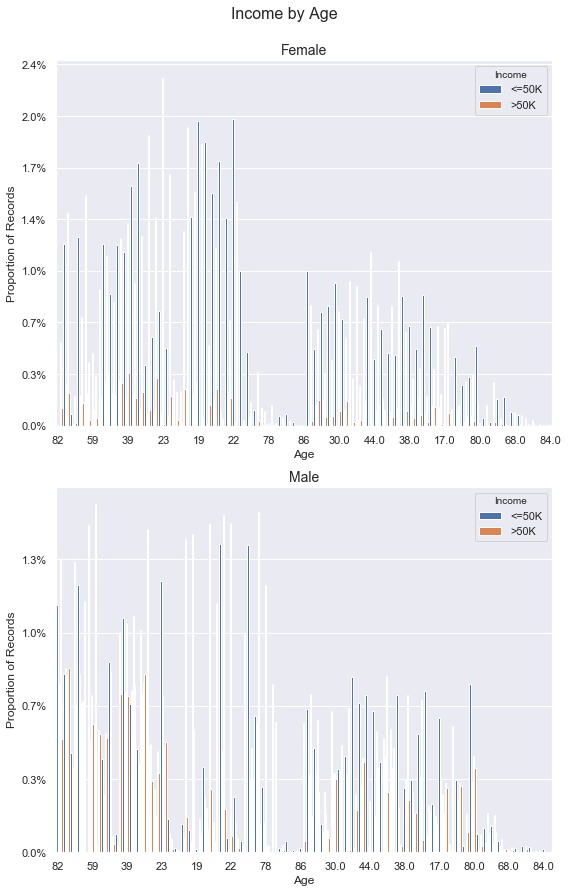

In [21]:
fig,ax=plt.subplots(2,1,figsize=(8,12))
#fig=plt.figure(figsize=(10,13));
#Initiateplot
sns.countplot(x='age',hue='income',data=adult_data[adult_data.sex=='Female'], saturation=1,ax=ax[0])
sns.countplot(x='age',hue='income',data=adult_data[adult_data.sex=='Male'],saturation=1, ax=ax[1])
#Addtitles
ax[0].set_title('Female',loc='center',fontsize=14)
ax[1].set_title('Male',loc='center',fontsize=14)
#Addlabels
ax[0].set_xlabel("Age")
ax[1].set_xlabel("Age")
ax[0].set_ylabel("Proportion of Records")
ax[1].set_ylabel("Proportion of Records")
#Addx_axisticks
new_ticks=[i.get_text()for i in ax[0].get_xticklabels()]
ax[0].set_xticks(range(0,len(new_ticks),10))
ax[0].set_xticklabels(new_ticks[::10])
ax[1].set_xticks(range(0,len(new_ticks),10))
ax[1].set_xticklabels(new_ticks[::10])
#Optimizey_axisticks
total_F=adult_data[adult_data.sex=='Female'].shape[0]*1.
total_M=adult_data[adult_data.sex=='Male'].shape[0]*1.
ax[0].set_yticklabels(map('{:.1f}%'.format,100*ax[0].yaxis.get_majorticklocs()/total_F))
ax[1].set_yticklabels(map('{:.1f}%'.format,100*ax[1].yaxis.get_majorticklocs()/total_M))
#Changelegendlocation
ax[0].legend(loc=1,title='Income')
ax[1].legend(loc=1,title='Income')
#Setsuptitle
fig.suptitle("Income by Age",fontsize=16,y=1.03)
fig.tight_layout()
fig.show()

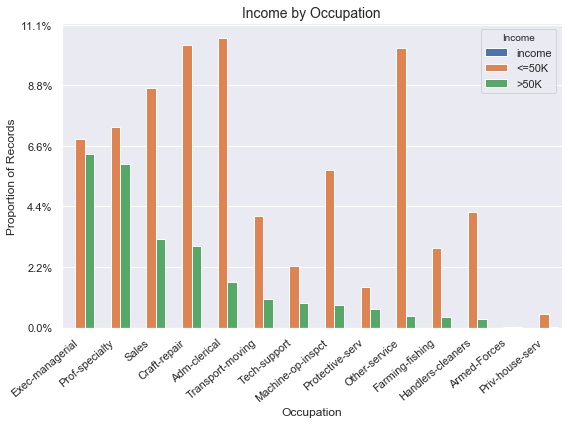

In [22]:
#Use occupation percentage of'>50K' as order of the plot
order=(adult_data.occupation[adult_data.income=='>50K'].value_counts()/adult_data.shape[0]).index

#Plotting the income by age

plt.figure(figsize=(8,6))

ax=sns.countplot(x='occupation',hue='income',order=order,data=adult_data,saturation=1)
ax.set_title('Income by Occupation',fontsize=14)
ax.set_xlabel("Occupation")
ax.set_ylabel("Proportion of Records")
#new_ticks=[i.get_text()foriinax.get_xticklabels()]
#plt.xticks(range(0,len(new_ticks),10),new_ticks[::10])
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")
total=adult_data.shape[0]*1.
ax.set_yticklabels(map('{:.1f}%'.format,100*ax.yaxis.get_majorticklocs()/total))
ax.legend(loc=1,title='Income')
plt.tight_layout()
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


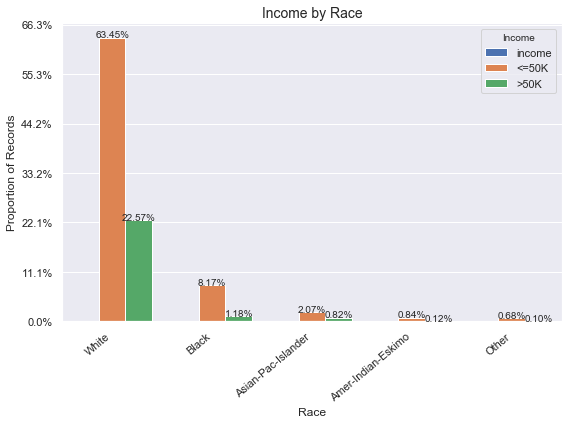

In [23]:
#Use occupation percentage of'>50K'as order of the plot

order=(adult_data.race[adult_data.income=='>50K'].value_counts()/adult_data.shape[0]).index

#Plotting the income by age

plt.figure(figsize=(8,6))

ax=sns.countplot(x='race',hue='income',order=order,data=adult_data,saturation=1)
ax.set_title('Income by Race',fontsize=14)
ax.set_xlabel("Race")
ax.set_ylabel("Proportion of Records")

#new_ticks=[i.get_text()foriinax.get_xticklabels()]
#plt.xticks(range(0,len(new_ticks),10),new_ticks[::10])

ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")
total=adult_data.shape[0]*1.
ax.set_yticklabels(map('{:.1f}%'.format,100*ax.yaxis.get_majorticklocs()/total))
ax.legend(loc=1,title='Income')

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height+3,'{:1.2f}%'.format(height/total*100.0),ha="center")
    
plt.tight_layout()
plt.show()

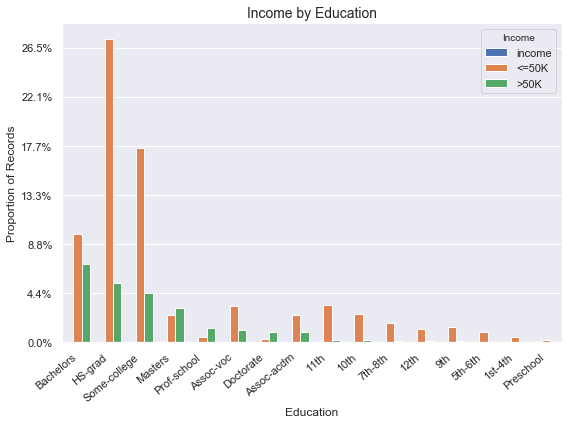

In [24]:
#Useoccupationpercentageof'>50K'asorderoftheplot
order=(adult_data.education[adult_data.income=='>50K'].value_counts()/adult_data.shape[0]).index

#Plottingtheincomebyage

plt.figure(figsize=(8,6))
ax=sns.countplot(x='education',hue='income',order=order,data=adult_data,saturation=1)
ax.set_title('Income by Education',fontsize=14)
ax.set_xlabel("Education")
ax.set_ylabel("Proportion of Records")

#new_ticks=[i.get_text()foriinax.get_xticklabels()]
#plt.xticks(range(0,len(new_ticks),10),new_ticks[::10])

ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")
total=adult_data.shape[0]*1.
ax.set_yticklabels(map('{:.1f}%'.format,100*ax.yaxis.get_majorticklocs()/total))
ax.legend(loc=1,title='Income')
plt.tight_layout()
plt.show()

In [25]:
#Total number of records
n_records=adult_data.shape[0]

#Number of records where individual's income is more than $50,000

n_greater_50k=np.sum(adult_data.income=='>50K')

#Number of records where individual's incomre is less than$50,000
n_at_most_50k=np.sum(adult_data.income=='<=50K')

#Percentage of indiciduals whose income is more than$50,000
greater_percentage=round(np.mean(adult_data.income=='>50K')*100.00,2)

#Print the results
print("Total number of records:{}".format(n_records))
print("Individuals making more than $50,000:{}".format(n_greater_50k))
print("Individuals making at most $50,000:{}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000:{}%".format(greater_percentage))

Total number of records:45223
Individuals making more than $50,000:11208
Individuals making at most $50,000:34014
Percentage of individuals making more than $50,000:24.78%
